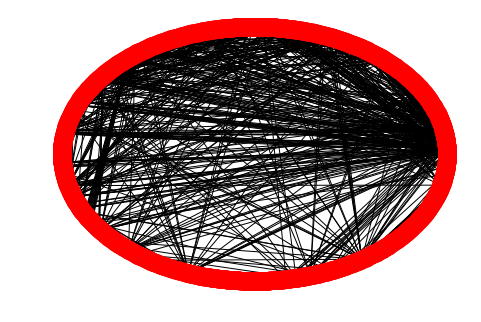

In [17]:
import networkx as nx
import matplotlib.pylab as plt

#g=nx.read_weighted_egdelist("edgelist.txt")

g=nx.read_edgelist('demo2.txt')
#nx.draw(g,show_labels=True)
nx.draw_circular(g)
plt.show()
#connection btw eadges and verties

In [10]:
print("*")

*


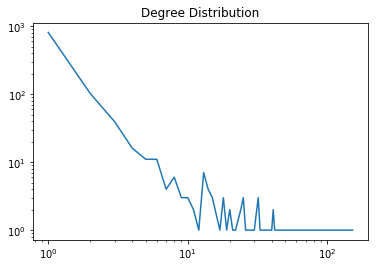

In [16]:
def plot_degree_distribution (wiki) :
    degs = {}
    for n in wiki.nodes () :
        deg = wiki.degree ( n )
        
        
        if deg not in degs :
            degs [ deg ] = 0
        
        degs [ deg ] += 1
    items = sorted ( degs.items () )
            
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title("Degree Distribution")
    fig.savefig ("degree_distribution.png")
    
g = nx.read_edgelist("demo2.txt")            
plot_degree_distribution(g)

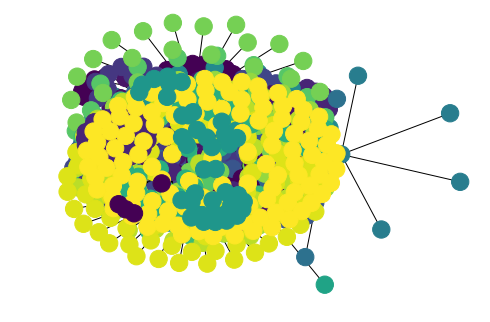

In [19]:
# taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777
# you need to install louvain package by using the following command
# pip install python-louvain --user


def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(ug, partition, scale=1049.)

    pos_nodes = _position_nodes(ug, partition, scale=1059.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos


from community import community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
ug = nx.read_edgelist("demo2.txt")
partition = community_louvain.best_partition(ug)
pos = community_layout(ug, partition)
cols = [float(i) for i in partition.values()]
nx.draw(ug,pos, node_color=cols, with_labels=False); 
plt.show()


In [7]:
%%!
pip install community

['Collecting community',
 '  Downloading https://files.pythonhosted.org/packages/e7/7b/6d1d5efe9518b73b61466607acd66e8d0463b8085c56253974d2c23d4b48/community-1.0.0b1.tar.gz',
 'Requirement already satisfied: Flask in c:\\users\\mohammed saeed ahmed\\anaconda3\\lib\\site-packages (from community) (1.0.2)',
 'Requirement already satisfied: requests in c:\\users\\mohammed saeed ahmed\\anaconda3\\lib\\site-packages (from community) (2.19.1)',
 'Requirement already satisfied: Jinja2>=2.10 in c:\\users\\mohammed saeed ahmed\\anaconda3\\lib\\site-packages (from Flask->community) (2.10)',
 'Requirement already satisfied: itsdangerous>=0.24 in c:\\users\\mohammed saeed ahmed\\anaconda3\\lib\\site-packages (from Flask->community) (0.24)',
 'Requirement already satisfied: click>=5.1 in c:\\users\\mohammed saeed ahmed\\anaconda3\\lib\\site-packages (from Flask->community) (6.7)',
 'Requirement already satisfied: Werkzeug>=0.14 in c:\\users\\mohammed saeed ahmed\\anaconda3\\lib\\site-packages (from

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
# read edge list
g = nx.read_edgelist("demo2.txt")
ug = nx.to_undirected(g)
# print basic info (is the graph ok?)
print(nx.info(ug))

Name: 
Type: GraphView
Number of nodes: 1059
Number of edges: 1646
Average degree:   3.1086
